In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


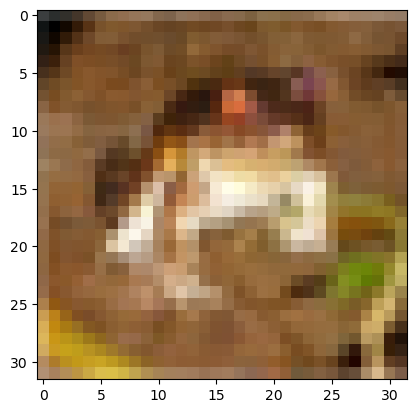

In [5]:
plt.imshow(X_train[0])

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [16]:
y_train.min()

0

In [10]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train_to_cat = to_categorical(y_train, num_classes=10)
y_test_to_cat = to_categorical(y_test, num_classes=10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(6,6), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(3,3), padding="same"))

model.add(Conv2D(filters=64, kernel_size=(6,6), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(3,3), padding="same"))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(32, activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        3488      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(patience=2, verbose=1, mode="min")

In [47]:
model.fit(X_train, y_train_to_cat, validation_data=(X_test, y_test_to_cat), epochs=50, callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6063 - accuracy: 0.4106 - val_loss: 1.2682 - val_accuracy: 0.5435
Epoch 2/50
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2146 - accuracy: 0.5658 - val_loss: 1.1971 - val_accuracy: 0.5805
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0341 - accuracy: 0.6349 - val_loss: 1.0611 - val_accuracy: 0.6301
Epoch 4/50
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9090 - accuracy: 0.6820 - val_loss: 1.0207 - val_accuracy: 0.6480
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8121 - accuracy: 0.7145 - val_loss: 0.9375 - val_accuracy: 0.6840
Epoch 6/50
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7309 - accuracy: 0.7436 - val_loss: 0.9612 - val_accuracy: 0.6815
Epoch 7/50
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6542 - accuracy: 0.7711 - val_loss: 1.0809 -

In [48]:
metricss = pd.DataFrame(model.history.history)

In [49]:
losses = metricss[["loss", "val_loss"]]

<Axes: >

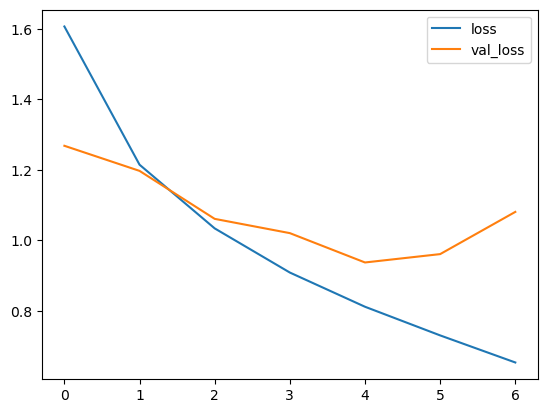

In [50]:
losses.plot()

In [51]:
prediction = np.argmax(model.predict(X_test)>0.5,axis=1)

313/313 [==============================] - 4s 13ms/step


In [52]:
prediction

array([5, 8, 0, ..., 5, 1, 7], dtype=int64)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [54]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.30      0.87      0.45      1000
           1       0.78      0.81      0.80      1000
           2       0.75      0.36      0.49      1000
           3       0.54      0.33      0.41      1000
           4       0.62      0.60      0.61      1000
           5       0.72      0.39      0.50      1000
           6       0.93      0.43      0.59      1000
           7       0.77      0.70      0.74      1000
           8       0.81      0.78      0.80      1000
           9       0.72      0.78      0.75      1000

    accuracy                           0.61     10000
   macro avg       0.69      0.61      0.61     10000
weighted avg       0.69      0.61      0.61     10000



In [55]:
new_data = X_test[0]

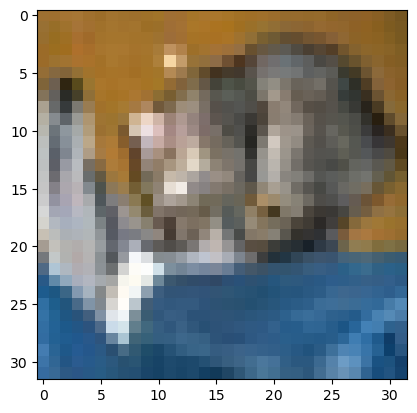

In [57]:
plt.imshow(new_data)

In [58]:
np.argmax(model.predict(new_data.reshape(1,32,32,3))>0.5,axis=1)

1/1 [==============================] - 0s 36ms/step


array([5], dtype=int64)